In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mwclient
import time
from datetime import datetime
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


In [21]:
data = pd.read_csv("dataset/bitcoin.csv")
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [22]:
site = mwclient.Site('en.wikipedia.org')
page = site.pages['Bitcoin']

ConnectionError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /w/api.php?meta=siteinfo%7Cuserinfo%7Cuserinfo&siprop=general%7Cnamespaces&uiprop=groups%7Crights%7Cblockinfo%7Chasmsg&continue=&action=query&format=json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000014FD2646310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
revs = list(page.revisions())
revs[0]

In [ ]:
revs = sorted(revs, key=lambda rev: rev["timestamp"])
revs[0]

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent["score"]
    if sent["label"] == "NEGATIVE":
        score *= -1
    return score

In [ ]:
edits = {}

for rev in revs:
    print(rev)
    date = time.strftime("%Y-%m-%d", rev["timestamp"])
    if date not in edits:
        edits[date] = dict(sentiments=list(), edit_count=0)

    edits[date]["edit_count"] += 1

    comment = rev.get("comment", "")
    edits[date]["sentiments"].append(find_sentiment(comment))

In [ ]:
from statistics import mean

for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0

    del edits[key]["sentiments"]

In [ ]:
edits_df = pd.DataFrame.from_dict(edits, orient="index")
edits_df

In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

In [ ]:
dates = pd.date_range(start="2009-03-08",end=datetime.today())

In [ ]:
edits_df = edits_df.reindex(dates, fill_value=0)
edits_df

In [ ]:
rolling_edits = edits_df.rolling(30, min_periods=30).mean()
rolling_edits = rolling_edits.dropna()
rolling_edits

In [ ]:
rolling_edits.tail(20)

In [ ]:
rolling_edits.to_csv("dataset/wikipedia_processed.csv")

In [23]:
frame = pd.read_csv('dataset/bitcoin.csv')
frame.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


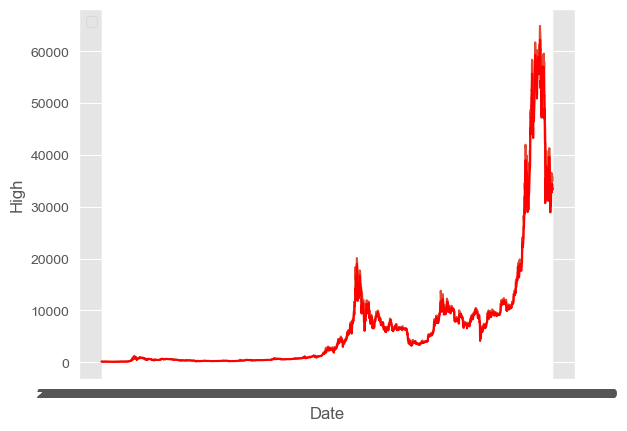

In [24]:
# Plotting the time series plot for the high and the low

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.lineplot(data=frame, x='Date', y='High')
sns.lineplot(data=frame, x='Date', y='Low', color='red')
plt.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


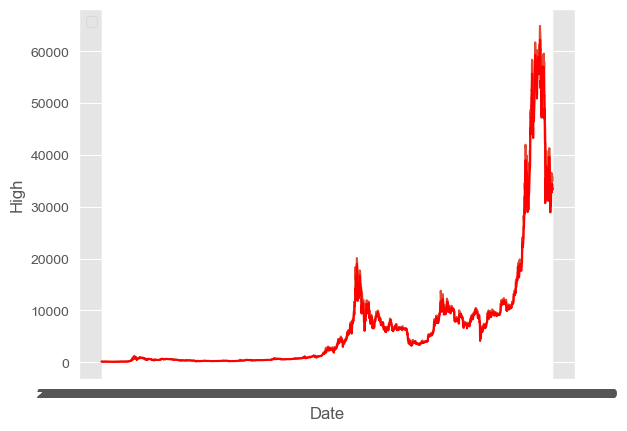

In [25]:
# Plotting the time series plot for the high and the low

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.lineplot(data=frame, x='Date', y='High')
sns.lineplot(data=frame, x='Date', y='Low', color='red')
plt.legend(loc='upper left')
plt.show()

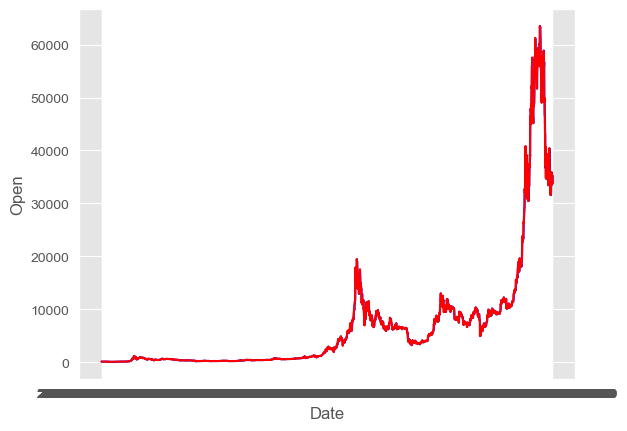

In [26]:
# Plotting the time series for the Open and Close
sns.lineplot(data=frame, x='Date', y='Open', color='blue')
sns.lineplot(data=frame, x='Date', y='Close', color='red')

plt.show()

### Summary notes between the high and the low

the graphs are almost identical to each other
both the high and the low respond the same to the market


### Summary notes betweent he high and the low

the graphs are almost identical to each other
both the high and the low respond the same to the market


In [27]:
values = max(frame['High'])
values

64863.0989077

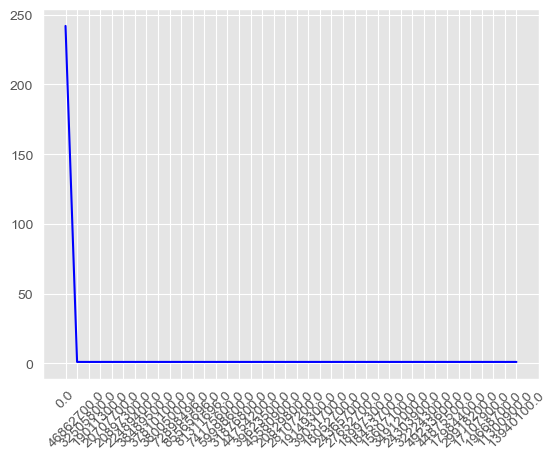

In [28]:
# Visualising the Volume
volume = frame['Volume']

from collections import Counter

volume_count = Counter()

for i in volume:
    volume_count.update(str(i).split(':'))

vol = []
freq = []

for item in volume_count.most_common(40):
    vol.append(item[0])
    freq.append(item[1])

sns.lineplot(x=vol, y=freq, color='blue')

plt.xticks(rotation=45)
plt.show()

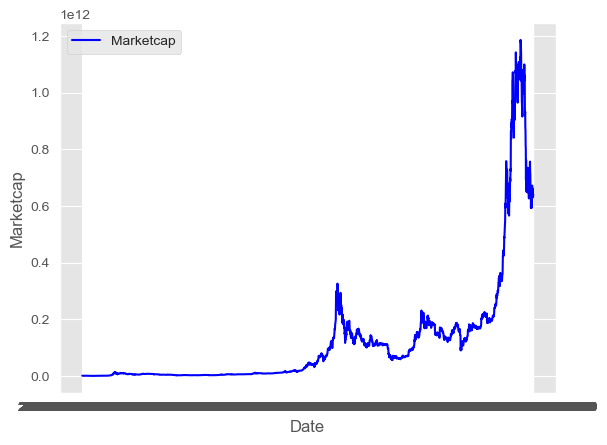

In [29]:
# Visualising the marketcap for the frame table
sns.lineplot(data=frame, x='Date', y='Marketcap', color='blue', label = 'Marketcap')

plt.show()

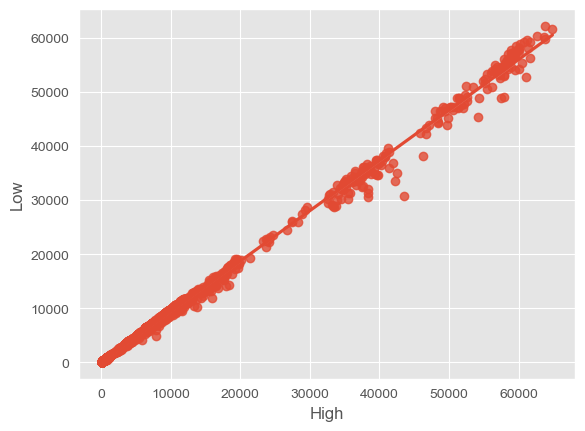

In [30]:
# The relationship between the high and the low
sns.regplot(data=frame, x='High', y='Low')
plt.show()


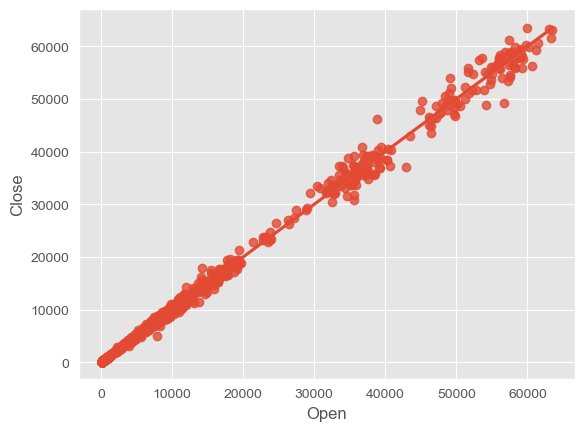

In [31]:
# The relationship between the opn and the close
sns.regplot(data=frame, x='Open', y='Close')
plt.show()

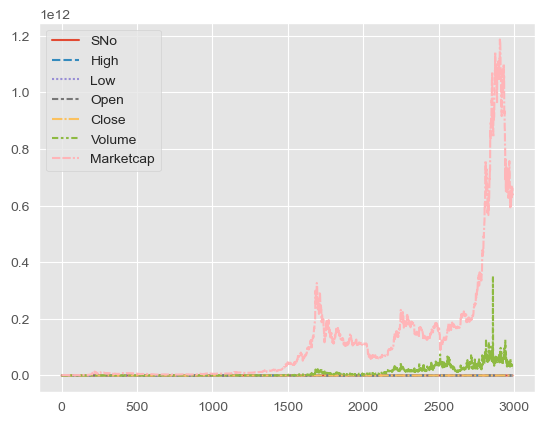

In [32]:
# Lineplot comparing all the numerical data in the frame
sns.lineplot(data=frame)

plt.show()

C:\Users\kudzai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


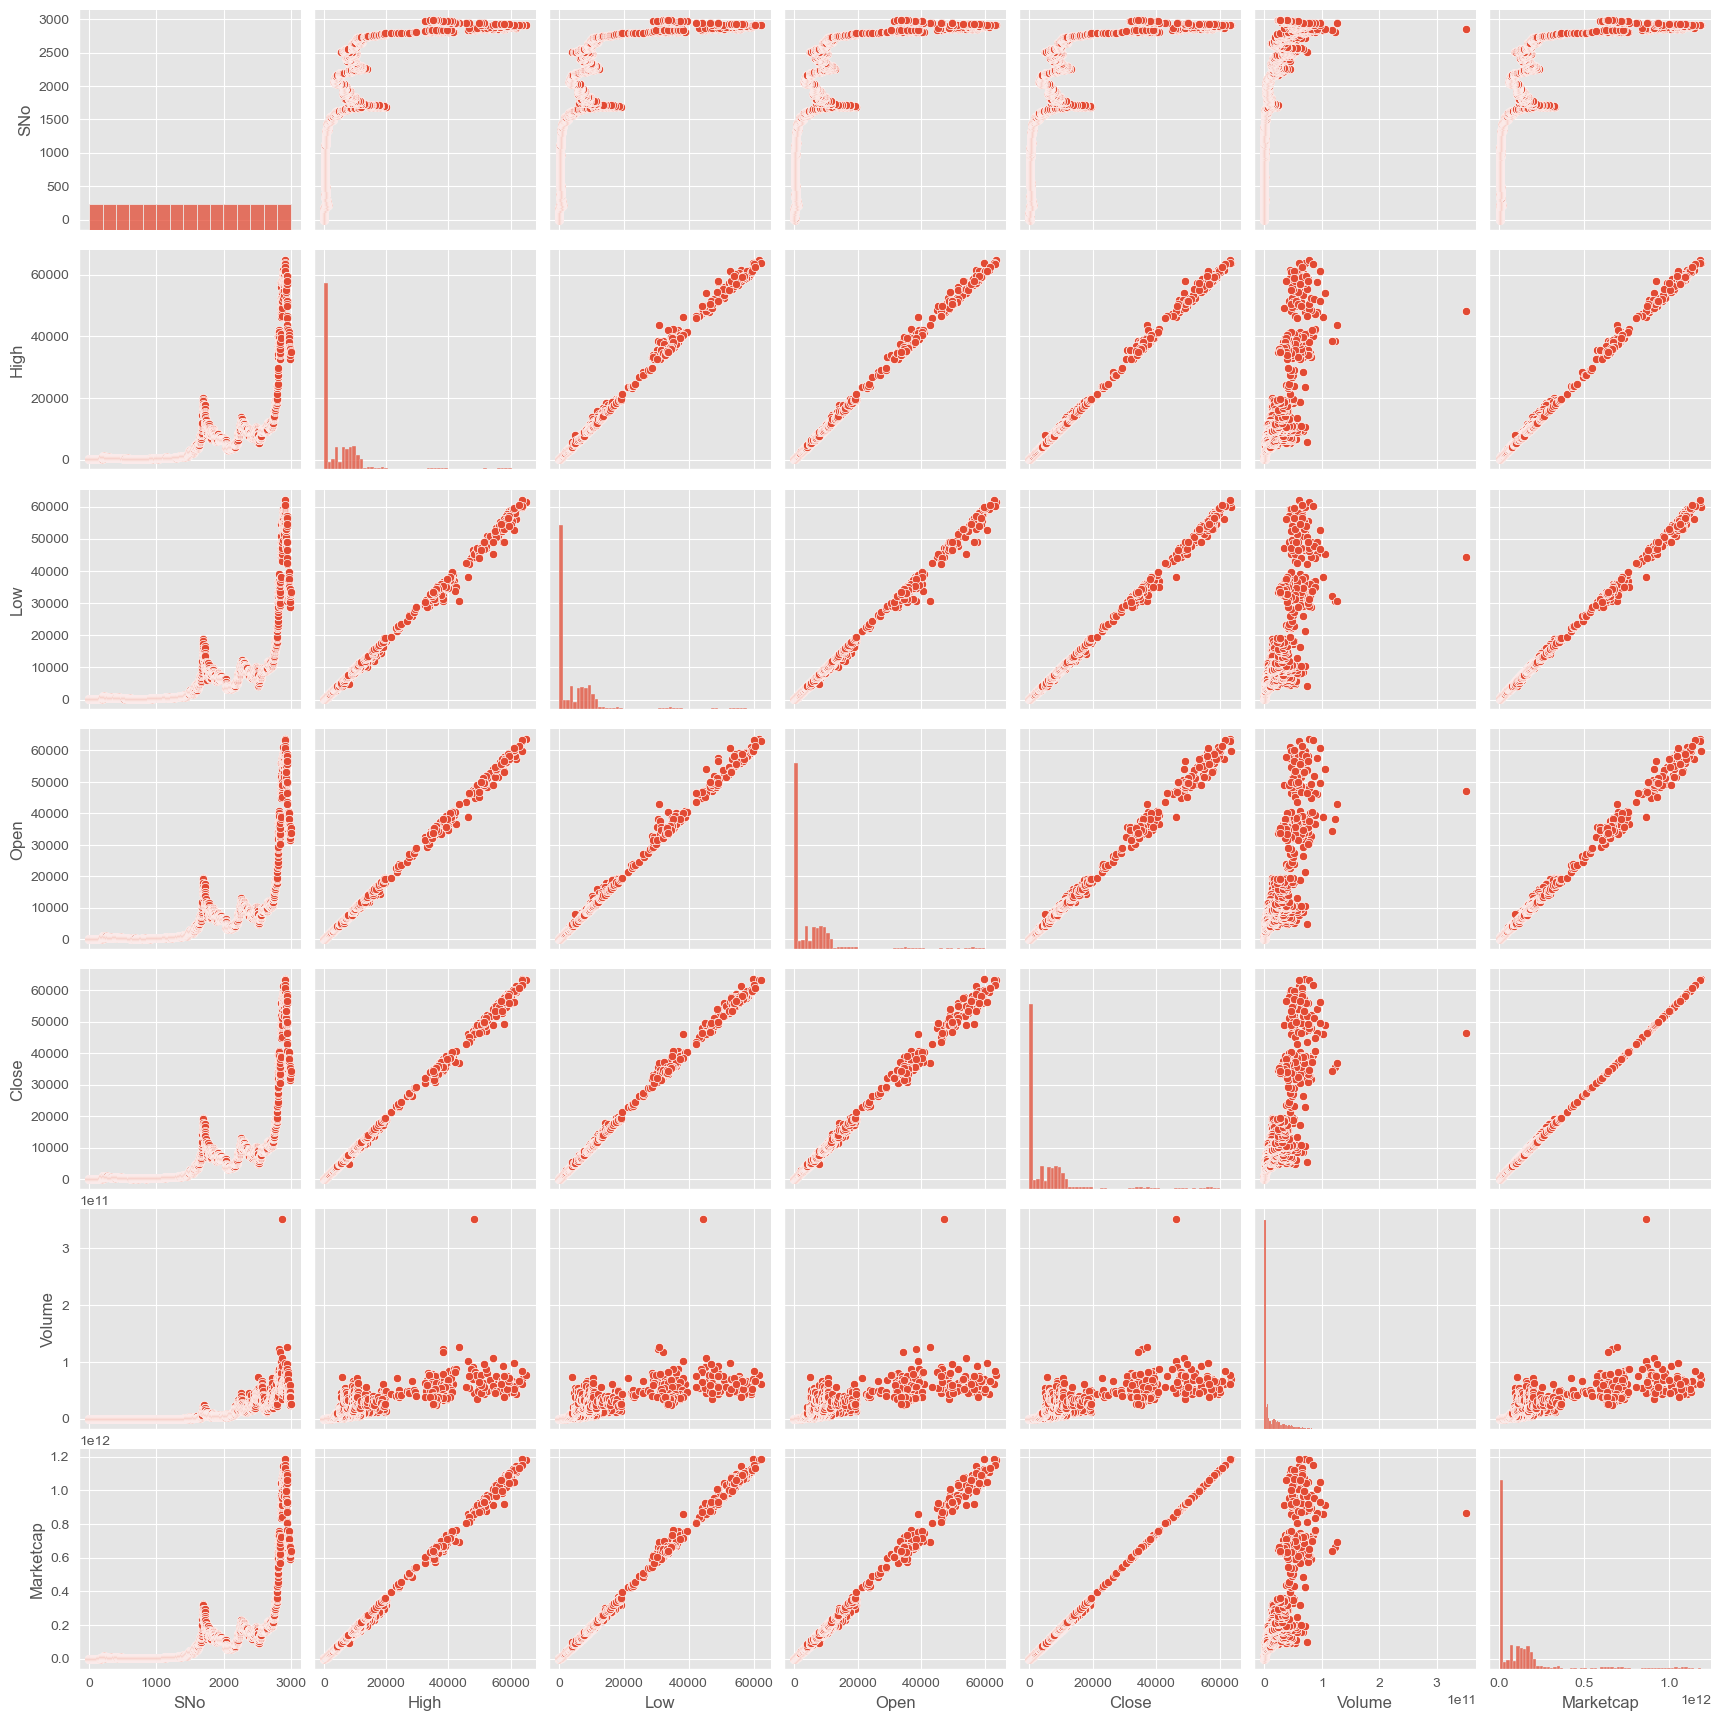

In [33]:
# Pairplot comparing all the numerical data in the frame
sns.pairplot(data=frame)

plt.show()

C:\Users\kudzai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


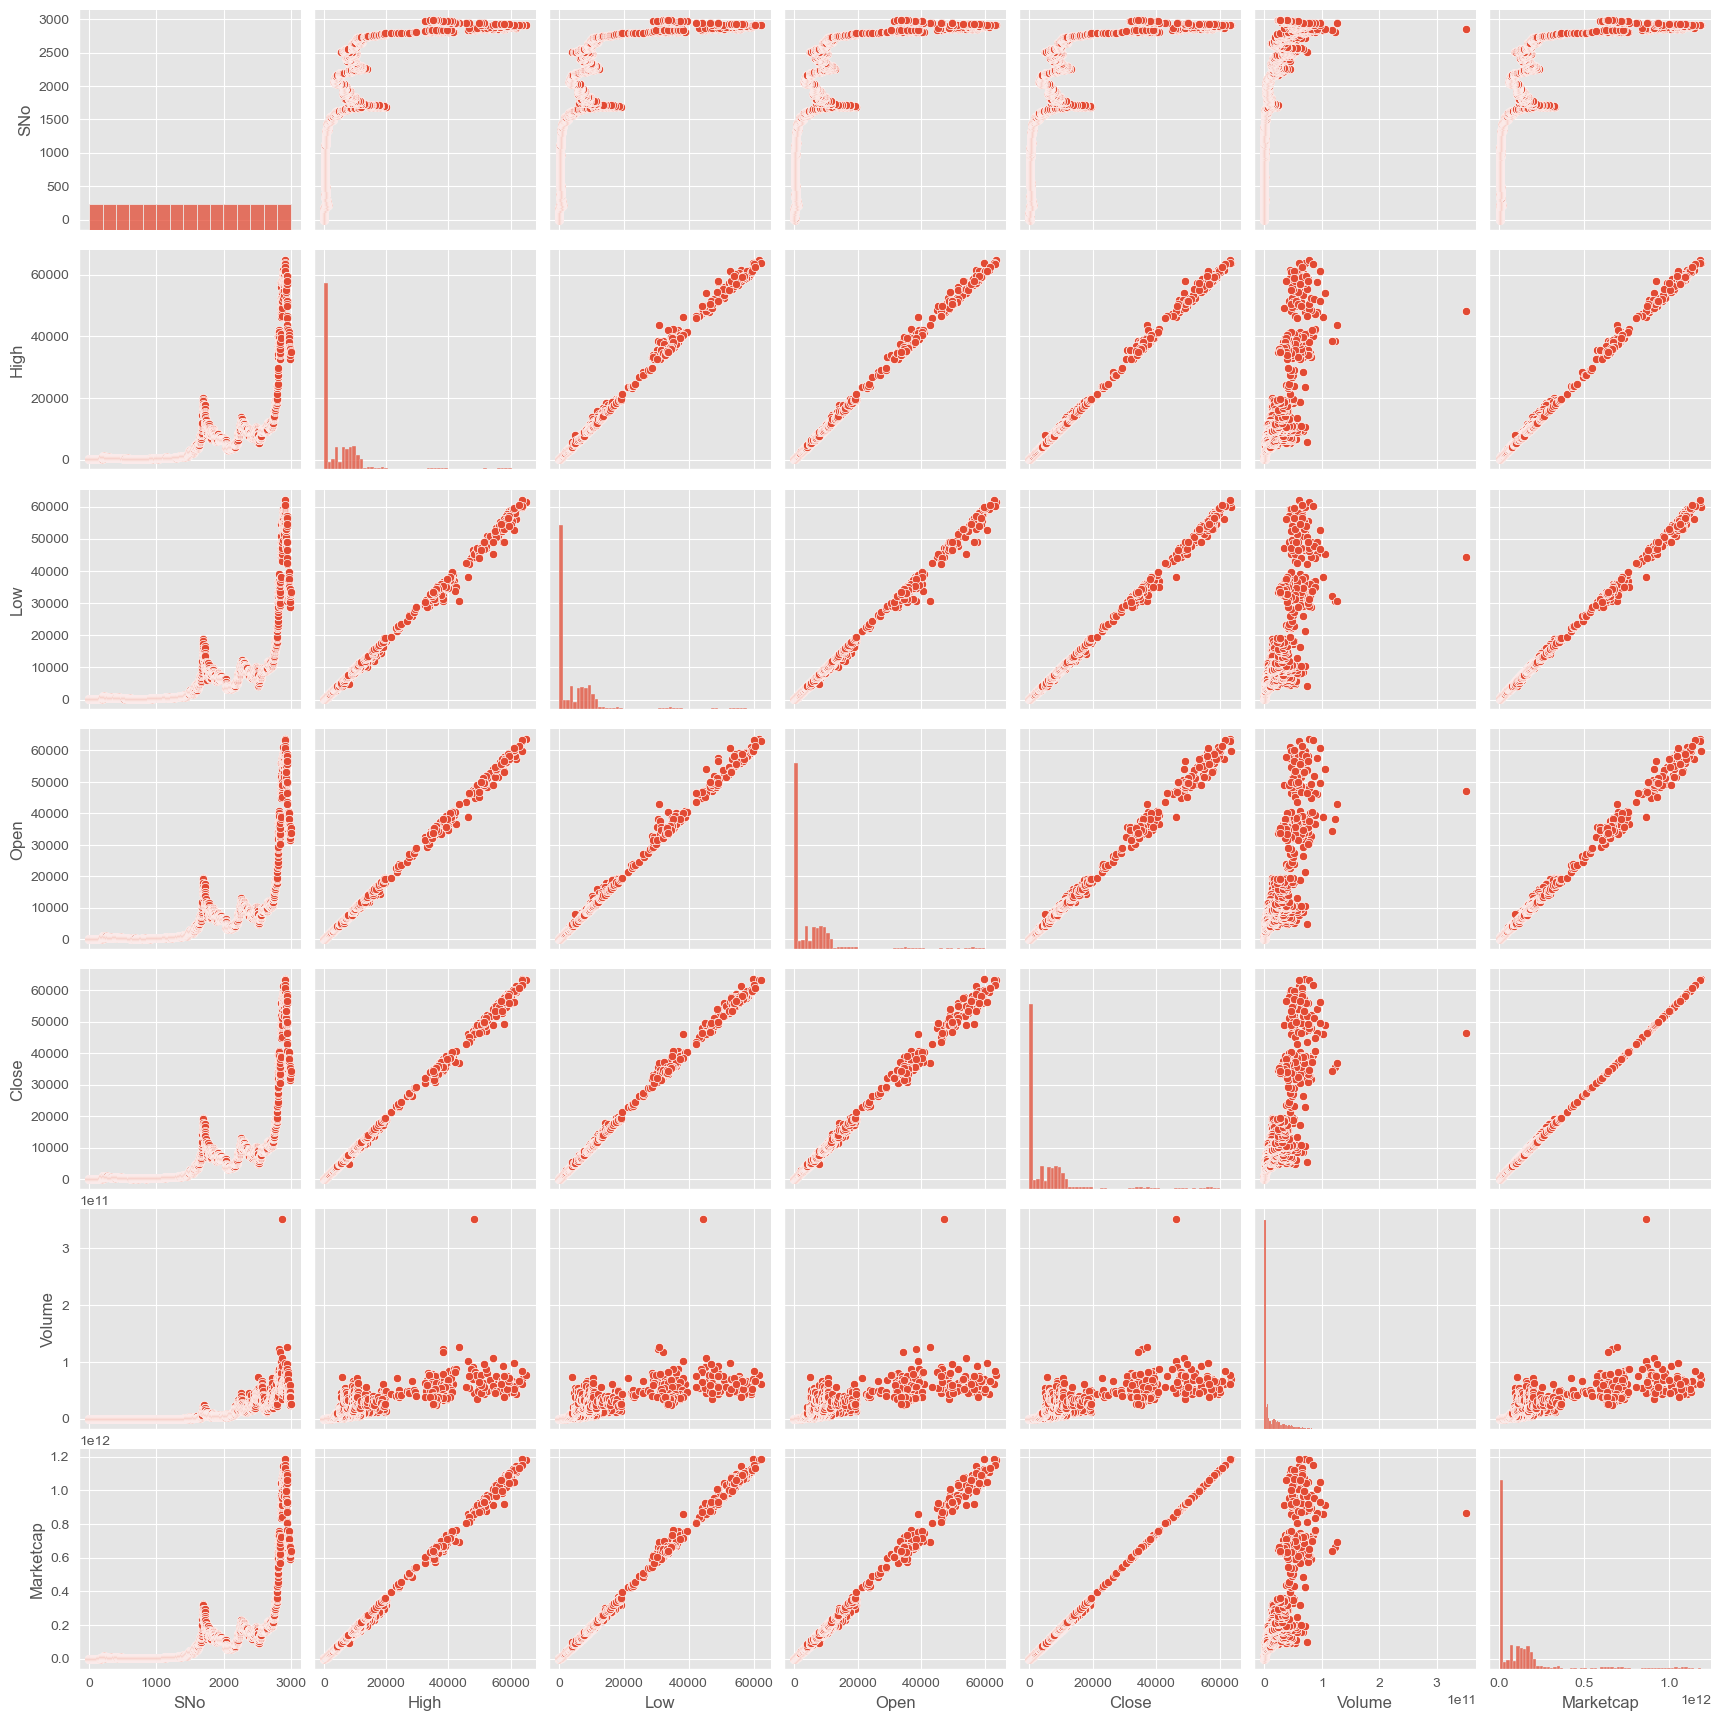

In [34]:
# Pairplot comparing all the numerical data in the frame
sns.pairplot(data=frame)

plt.show()

## Data Pre Proceeding and Machine Learning Prediction

In [217]:
bitcoin = pd.read_csv("dataset/bitcoin.csv")
sentiments = pd.read_csv("dataset/wikipedia_processed.csv")

In [218]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [219]:
bitcoin.columns = [c.lower() for c in bitcoin.columns]
bitcoin.columns

Index(['sno', 'name', 'symbol', 'date', 'high', 'low', 'open', 'close',
       'volume', 'marketcap'],
      dtype='object')

In [220]:
bitcoin.drop(columns=["sno", "name", "symbol","marketcap"], inplace=True)

### Merge the bitcoin and sentiment data set via date

In [221]:
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin["date"] = bitcoin["date"].dt.date

In [222]:
# Make the date column the new index
bitcoin.index = bitcoin.date
bitcoin.index

Index([2013-04-29, 2013-04-30, 2013-05-01, 2013-05-02, 2013-05-03, 2013-05-04,
       2013-05-05, 2013-05-06, 2013-05-07, 2013-05-08,
       ...
       2021-06-27, 2021-06-28, 2021-06-29, 2021-06-30, 2021-07-01, 2021-07-02,
       2021-07-03, 2021-07-04, 2021-07-05, 2021-07-06],
      dtype='object', name='date', length=2991)

In [223]:
bitcoin.sort_index(ascending=False)
bitcoin.head()

,date,high,low,open,close,volume
date,,,,,,
2013-04-29,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0
2013-04-30,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0
2013-05-01,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0
2013-05-02,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0
2013-05-03,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0


In [224]:
sentiments.index = pd.to_datetime(sentiments["Unnamed: 0"])
sentiments.index

DatetimeIndex(['2009-04-06', '2009-04-07', '2009-04-08', '2009-04-09',
               '2009-04-10', '2009-04-11', '2009-04-12', '2009-04-13',
               '2009-04-14', '2009-04-15',
               ...
               '2024-03-15', '2024-03-16', '2024-03-17', '2024-03-18',
               '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22',
               '2024-03-23', '2024-03-24'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=5467, freq=None)

In [225]:
sentiments.sort_index(ascending=True)
sentiments.head()

,Unnamed: 0,edit_count,sentiment,neg_sentiment
Unnamed: 0,,,,
2009-04-06,2009-04-06,0.133333,-0.018351,0.025
2009-04-07,2009-04-07,0.000000,0.000000,0.000
2009-04-08,2009-04-08,0.000000,0.000000,0.000
2009-04-09,2009-04-09,0.000000,0.000000,0.000
2009-04-10,2009-04-10,0.000000,0.000000,0.000


In [226]:
# Merge bitcoin and sentiments data using index
bitcoin_sentiments = bitcoin.merge(sentiments, left_index=True, right_index=True)
bitcoin_sentiments.head()

,date,high,low,open,close,volume,Unnamed: 0,edit_count,sentiment,neg_sentiment
2013-04-29,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,2013-04-29,15.933333,-0.223667,0.606449
2013-04-30,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,2013-04-30,15.733333,-0.226588,0.609227
2013-05-01,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,2013-05-01,13.733333,-0.259926,0.626969
2013-05-02,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,2013-05-02,13.633333,-0.271788,0.615858
2013-05-03,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,2013-05-03,13.333333,-0.286176,0.622525


In [227]:
# Remove date columns
del bitcoin_sentiments["Unnamed: 0"]
del bitcoin_sentiments["date"]
bitcoin_sentiments.dropna(inplace=True)
bitcoin_sentiments.head()

,high,low,open,close,volume,edit_count,sentiment,neg_sentiment
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,15.933333,-0.223667,0.606449
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,15.733333,-0.226588,0.609227
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,13.733333,-0.259926,0.626969
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,13.633333,-0.271788,0.615858
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,13.333333,-0.286176,0.622525


In [228]:
#Check for any missing values
bitcoin_sentiments.isna().sum()

high             0
low              0
open             0
close            0
volume           0
edit_count       0
sentiment        0
neg_sentiment    0
dtype: int64

## Generating Target by shifting back the close column

In [229]:
bitcoin_sentiments["tomorrow"] = bitcoin_sentiments["close"].shift(-1)
bitcoin_sentiments["target"] = (bitcoin_sentiments["tomorrow"] > bitcoin_sentiments["close"]).astype(int)

<Axes: title={'center': 'Target Value Count'}, xlabel='target'>

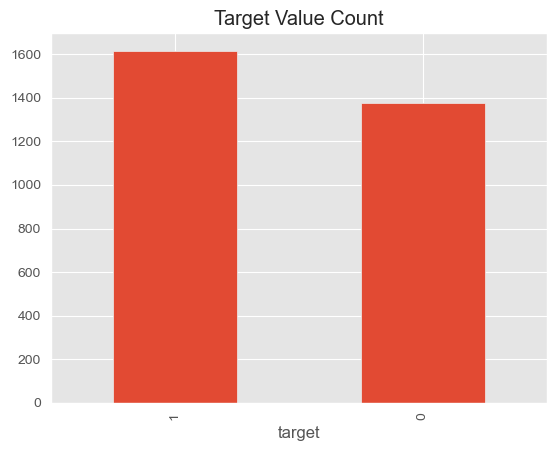

In [230]:
(bitcoin_sentiments["target"]
 .value_counts()
 .plot(kind='bar', title = "Target Value Count"))

#### Value count diagram shows we don't have an unbalanced classification problem

In [231]:
# Exoport data set
bitcoin_sentiments.to_csv("dataset/bitcoin_sentiments")

# Creating and tuning the suitable machine learning model

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pickle

#### Shuffle the data for better model results

In [233]:
shuffled_data = bitcoin_sentiments.sample(frac=1)
shuffled_data.reset_index(drop=True, inplace=True)
shuffled_data.head()

,high,low,open,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,10074.238246,9727.143574,10067.962651,9729.323764,1.514493e+10,1.400000,-0.171418,0.253333,8620.566427,0
1,9951.746149,9537.043223,9921.583461,9650.174807,4.508050e+10,0.733333,-0.018175,0.112821,9341.705169,0
2,7134.450528,6555.504275,6640.453889,7116.804218,4.678324e+10,0.633333,-0.028615,0.161905,7096.184659,0
3,3926.597729,3891.904192,3913.047443,3906.717169,9.469185e+09,0.366667,-0.061795,0.114286,3924.369118,1
4,215.050003,203.990005,205.990005,215.050003,0.000000e+00,7.700000,-0.234723,0.430000,229.100006,1


In [246]:
shuffled_data.dropna(inplace=True)

### Dividing the data to X (Features) and Y (Labels)

In [247]:
#Create X (features matrix)
x = shuffled_data.drop("target", axis=1)
x

,high,low,open,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
0,10074.238246,9727.143574,10067.962651,9729.323764,1.514493e+10,1.400000,-0.171418,0.253333,8620.566427
1,9951.746149,9537.043223,9921.583461,9650.174807,4.508050e+10,0.733333,-0.018175,0.112821,9341.705169
2,7134.450528,6555.504275,6640.453889,7116.804218,4.678324e+10,0.633333,-0.028615,0.161905,7096.184659
3,3926.597729,3891.904192,3913.047443,3906.717169,9.469185e+09,0.366667,-0.061795,0.114286,3924.369118
4,215.050003,203.990005,205.990005,215.050003,0.000000e+00,7.700000,-0.234723,0.430000,229.100006
...,...,...,...,...,...,...,...,...,...
2986,101.900002,93.110001,93.605003,98.400200,0.000000e+00,1.266667,-0.175098,0.301389,97.450798
2987,421.166992,406.783997,407.656006,416.321991,8.319360e+07,3.333333,-0.302308,0.579444,422.372986
2988,2768.080078,2480.959961,2757.500000,2576.479980,1.460090e+09,3.766667,-0.241187,0.496548,2529.449951
2989,7207.850098,6863.520020,6892.479980,6973.529785,4.553270e+09,1.666667,-0.114579,0.286667,6844.229980


In [248]:
#Create Y (labels)
y = shuffled_data["target"]
y

0       0
1       0
2       0
3       1
4       1
       ..
2986    0
2987    1
2988    0
2989    0
2990    1
Name: target, Length: 2990, dtype: int32

### Function to evaluate the models

In [249]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true labels vs y_preds labels 
    """
    accuracy    =   accuracy_score(y_true, y_preds)
    precision   =   precision_score(y_test, y_preds,average="micro")
    recall      =   recall_score(y_test, y_preds, average="micro")
    f1          =   f1_score(y_test, y_preds, average="micro")

    matrix_ev_dict = dict({
        "accuracy"    : round(accuracy,2),
        "precision"   : round(precision,2),
        "recall"      : round(recall,2),
        "f1"          : round(f1,2)
    })

    print(f'Accuracy {round(accuracy*100, 2)}%')
    print(f'Precision: {round(precision*100,2)}%')
    print(f'Recall: {round(recall*100,2)}%')
    print(f'F1: {round(f1*100,2)}%')

    return matrix_ev_dict

In [250]:
# Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Base model with default parameters
clf_base = RandomForestClassifier().fit(x_train, y_train)
base_y_preds = clf_base.predict(x_test)

# Evaluate base model
base_metrics = evaluate_preds(y_test, base_y_preds)

Accuracy 67.56%
Precision: 67.56%
Recall: 67.56%
F1: 67.56%
